In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
 
from sklearn.decomposition import FactorAnalysis, NMF
from sklearn.decomposition import PCA, TruncatedSVD
from operator import truediv

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
# !pip install spectral
import spectral
import mat73
import tensorflow 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [42]:
train="C:/Users/vibhu/Desktop/projects/Govn_doc_detection/train"
valid="C:/Users/vibhu/Desktop/projects/Govn_doc_detection/valid"

datagen = ImageDataGenerator(rescale = 1./255,
featurewise_center=True)
    # featurewise_std_normalization=True,
    # rotation_range=13,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # zoom_range=0.2)

train_generator = datagen.flow_from_directory(directory=train, 
                                              classes=['aadhar','pan','driver','passport'],
                                              target_size=(224, 224), 
                                              class_mode='categorical',
                                              batch_size=5)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_std_normalization=True)

valid_generator = valid_datagen.flow_from_directory(directory=valid, 
                                              classes=['aadhar','pan','driver','passport'],
                                              target_size=(224, 224),
                                              class_mode='categorical',                       
                                              batch_size=5)
                                              

Found 90 images belonging to 4 classes.
Found 41 images belonging to 4 classes.


c:\Users\vibhu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [67]:
test="C:/Users/vibhu/Desktop/projects/Govn_doc_detection/test"
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_std_normalization=True)

test_generator = test_datagen.flow_from_directory(directory=test, 
                                              classes=['aadhar','pan','driver','passport'],
                                              target_size=(224, 224),
                                              class_mode='categorical',                       
                                              batch_size=5)

Found 1 images belonging to 4 classes.


In [57]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
cnn = keras.Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu'))   #adding 32(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(64,(3,3),activation='relu'))   #adding 64(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(128,(3,3),activation='relu'))   #adding 128(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(256,(3,3),activation='relu'))   #adding 128(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(512,(3,3),activation='relu'))   #adding 128(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size

cnn.add(Conv2D(1024,(3,3),activation='relu'))   #adding 128(3X3 filters)
cnn.add(MaxPooling2D((2,2)))  #2x2 window size


cnn.add(Flatten())  #96 input neurons
cnn.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.5))
cnn.add(Dense(4, activation='sigmoid'))

In [58]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = cnn.fit_generator(generator=train_generator,            
                            validation_data=valid_generator,                            
                            epochs=20)

C:\Users\vibhu\AppData\Local\Temp/ipykernel_23456/1834469270.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(generator=train_generator,


Epoch 1/20
18/18 [==============================] - 6s 322ms/step - loss: 1.3948 - accuracy: 0.2000 - val_loss: 1.3893 - val_accuracy: 0.2195
Epoch 2/20
18/18 [==============================] - 5s 300ms/step - loss: 1.3829 - accuracy: 0.2778 - val_loss: 1.3869 - val_accuracy: 0.2195
Epoch 3/20
18/18 [==============================] - 5s 280ms/step - loss: 1.3793 - accuracy: 0.2444 - val_loss: 1.3857 - val_accuracy: 0.2927
Epoch 4/20
18/18 [==============================] - 5s 287ms/step - loss: 1.3743 - accuracy: 0.3000 - val_loss: 1.3863 - val_accuracy: 0.3171
Epoch 5/20
18/18 [==============================] - 5s 275ms/step - loss: 1.3671 - accuracy: 0.3778 - val_loss: 1.3886 - val_accuracy: 0.3171
Epoch 6/20
18/18 [==============================] - 7s 377ms/step - loss: 1.3490 - accuracy: 0.3778 - val_loss: 1.3888 - val_accuracy: 0.2927
Epoch 7/20
18/18 [==============================] - 9s 487ms/step - loss: 1.4014 - accuracy: 0.2222 - val_loss: 1.3842 - val_accuracy: 0.2927
Epoch 

In [46]:
cnn.save('doc_detect.h5')

In [40]:
# saved_model = keras.models.load_model('C:/Users/vibhu/Desktop/projects/Govn_doc_detection/doc_detect.h5')

# Check its architecture
# saved_model.summary()

OSError: No file or directory found at C:/Users/vibhu/Desktop/projects/Govn_doc_detection/doc_detect.h5

C:\Users\vibhu\AppData\Local\Temp/ipykernel_23456/1470513213.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  cnn.evaluate_generator(generator=valid_generator)
C:\Users\vibhu\AppData\Local\Temp/ipykernel_23456/1470513213.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=cnn.predict_generator(test_generator)


[1]


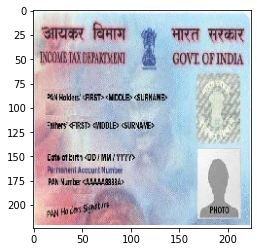

In [68]:
#evaluate
cnn.evaluate_generator(generator=valid_generator)
#predict 
pred=cnn.predict_generator(test_generator)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

x,y = test_generator.next()
for i in range(len(predicted_class_indices)):
    image = x[i]
    plt.imshow(image)

In [69]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
for i in predictions:
    print(i)

pan


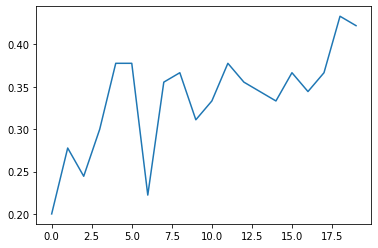

In [70]:
plt.plot(history.history['accuracy'])